In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy import interpolate
import os
import pandas as pd
plt.style.use('../report.mplstyle')


In [82]:
files = os.listdir('data/')

for file in files:
    if file.endswith('.csv'):
        os.rename('data/'+file, 'data/moku_csv/'+file)

    elif file.endswith('.png'):
        os.rename('data/'+file, 'data/moku_images/'+file)

def float_array_convert(array):
    return np.array([float(i) for i in array])

lp_data = pd.read_csv('data/csv/lp_data.csv',sep = ',')
hp_data = pd.read_csv('data/csv/hp_data.csv',sep = ',')

lp_peak_to_peak, lp_phase, lp_freq = lp_data['peaktopeak'], lp_data['phase'], lp_data['frequency']
hp_peak_to_peak, hp_phase, hp_freq = hp_data['peaktopeak'], hp_data['phase'], hp_data['frequency']

lp_peak_to_peak, lp_phase, lp_freq = float_array_convert(lp_peak_to_peak), float_array_convert(lp_phase), float_array_convert(lp_freq)
hp_peak_to_peak, hp_phase, hp_freq = float_array_convert(hp_peak_to_peak), (float_array_convert(hp_phase))-np.pi/2, float_array_convert(hp_freq)


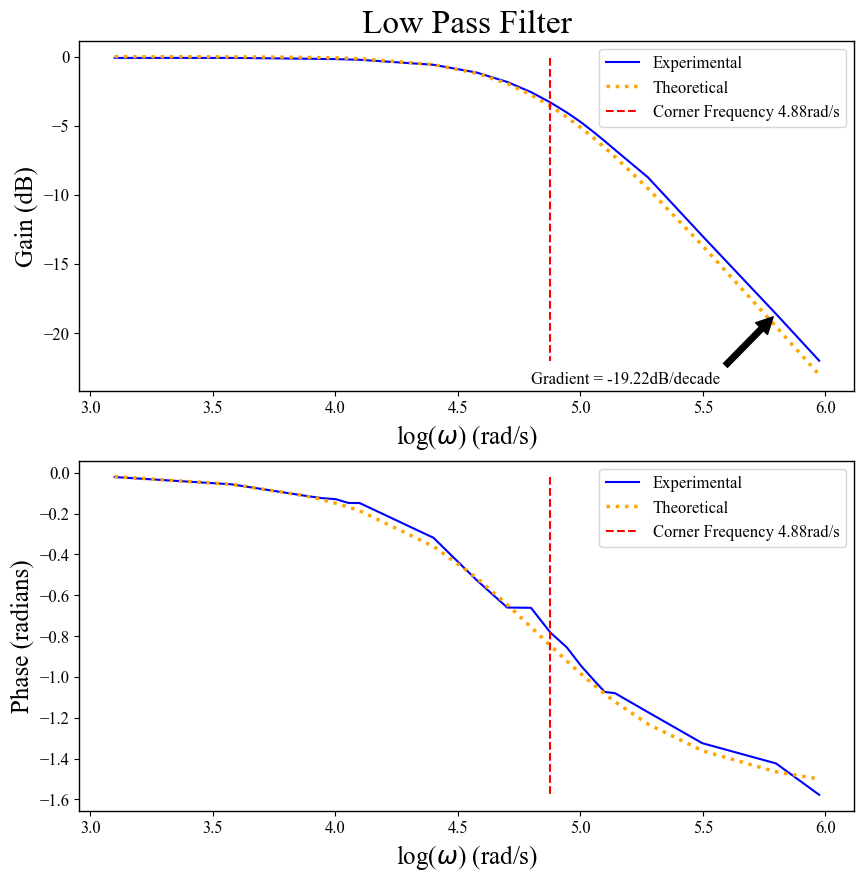

In [83]:
def arctan(x,r,c):
    return -np.arctan(x*r*c)

def corner_freq(x,y):
    return np.full_like(y,x[np.argmin(np.abs(y+3))])

def gradient(x,y):
    return np.gradient(x,y)

lp_resistance = 15000
lp_capacitance = 1e-9

log_lp_gain = 20*np.log10(lp_peak_to_peak)
lp_omega = (lp_freq*2*np.pi)
log_lp_omega = np.log10(lp_omega)
log_lp_theo_gain = 20*np.log10(1/np.sqrt(1+(lp_omega*lp_resistance*lp_capacitance)**2))
lp_theo_phase = arctan(lp_omega,lp_resistance,lp_capacitance)
lp_corner_freq = corner_freq(log_lp_omega,log_lp_gain)



plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(log_lp_omega,log_lp_gain, label = 'Experimental', color = 'blue')
plt.plot(log_lp_omega,log_lp_theo_gain, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(lp_corner_freq,log_lp_gain, label = f'Corner Frequency {lp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.annotate(f'Gradient = {gradient(log_lp_gain,log_lp_omega)[-1]:.2f}dB/decade', xy = (log_lp_omega[-2],log_lp_gain[-2]), arrowprops=dict(facecolor = 'black', shrink = 0.05,), xytext = (log_lp_omega[-2]-1,log_lp_gain[-2]-5))
plt.xlabel(r'log($\omega$) (rad/s)')
plt.ylabel('Gain (dB)')
plt.title('Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot(log_lp_omega,lp_phase, label = 'Experimental', color = 'blue')
plt.plot(log_lp_omega,lp_theo_phase, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(lp_corner_freq,lp_phase, label = f'Corner Frequency {lp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.xlabel(r'log($\omega$) (rad/s)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()



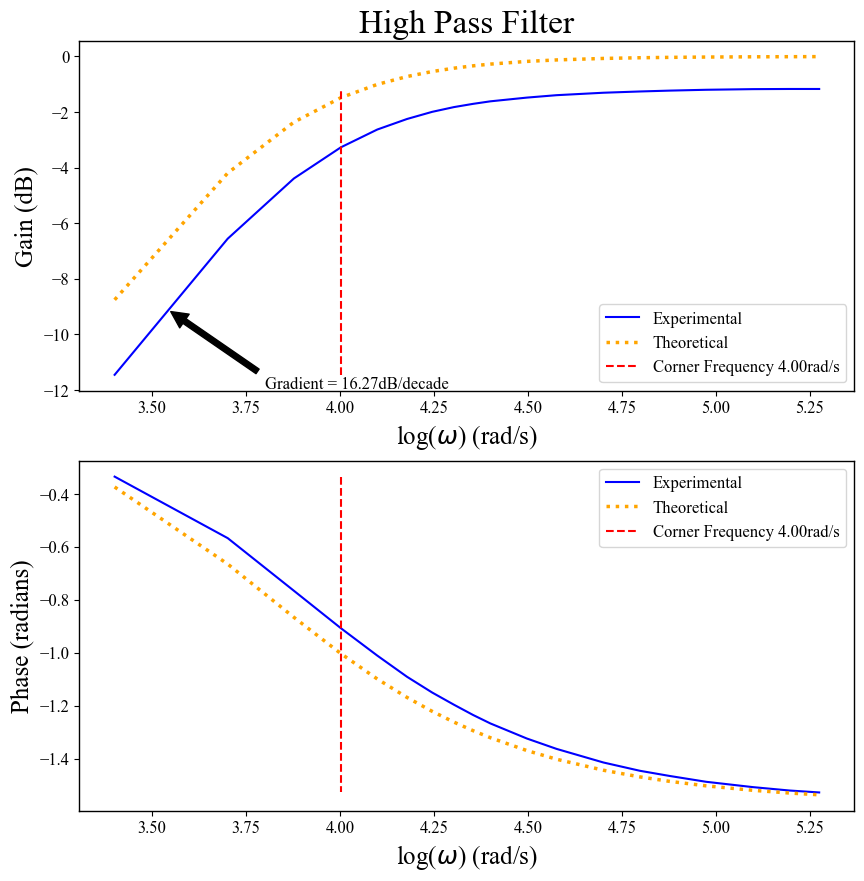

In [98]:
hp_resistance = 156000
hp_capacitance = 1e-9

log_hp_gain = 20*np.log10(hp_peak_to_peak)
hp_omega = (hp_freq*2*np.pi)
log_hp_omega = np.log10(hp_omega)
log_hp_theo_gain = 20*np.log10(hp_omega*hp_resistance*hp_capacitance/(np.sqrt(1+(hp_omega*hp_resistance*hp_capacitance)**2)))
hp_theo_phase = arctan(hp_omega,hp_resistance,hp_capacitance)
hp_corner_freq = corner_freq(log_hp_omega,log_hp_gain)


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(log_hp_omega,log_hp_gain, label = 'Experimental', color = 'blue')
plt.plot(log_hp_omega,log_hp_theo_gain, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_corner_freq,log_hp_gain, label = f'Corner Frequency {hp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.annotate(f'Gradient = {gradient(log_hp_gain,log_hp_omega)[0]:.2f}dB/decade', xy = (log_hp_omega[1]-0.165,log_hp_gain[1]-2.5), arrowprops=dict(facecolor = 'black', shrink = 0.05,), xytext = (log_hp_omega[1]+0.1,log_hp_gain[1]-5.4))
plt.xlabel(r'log($\omega$) (rad/s)')
plt.ylabel('Gain (dB)')
plt.title('High Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot(log_hp_omega,hp_phase, label = 'Experimental', color = 'blue')
plt.plot(log_hp_omega,hp_theo_phase, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_corner_freq,hp_phase, label = f'Corner Frequency {hp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.xlabel(r'log($\omega$) (rad/s)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()
